In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

import compute_charge_dist as fz

from scipy.optimize import curve_fit

import time

%matplotlib inline


#grain_type = "silicate"
grain_type = "carbonaceous"
pcent      = 1

include_500_1000 = True

########################################################################################

grain_size = 3

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_3AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 5

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_5AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 10

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_10AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 50

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_50AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 100

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_100AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

if include_500_1000 == True:
    print("Loading the charge distribution for 500 and 1000 Angstrom grains")
    grain_size = 500
    pcent      = 0.1

    save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_500AA = pickle.load(pkl_file)
    pkl_file.close

    ########################################################################################

    grain_size = 1000

    save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_1000AA = pickle.load(pkl_file)
    pkl_file.close


Loading the charge distribution for 500 and 1000 Angstrom grains


In [5]:
too_high = np.where(cdist_3AA["nH"] > 2.0e4)
if include_500_1000 == True:
    too_high_500_1000 = np.where(cdist_500AA["nH"] > 2.0e4)
    
ii = 0
for key in cdist_3AA.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax":
        #print(key)
        cdist_3AA[key]    = np.delete(cdist_3AA[key],    too_high)
        cdist_5AA[key]    = np.delete(cdist_5AA[key],    too_high)
        cdist_10AA[key]   = np.delete(cdist_10AA[key],   too_high)
        cdist_50AA[key]   = np.delete(cdist_50AA[key],   too_high)
        cdist_100AA[key]  = np.delete(cdist_100AA[key],  too_high)
        if include_500_1000 == True:
            cdist_500AA[key]  = np.delete(cdist_500AA[key],  too_high_500_1000)
            cdist_1000AA[key] = np.delete(cdist_1000AA[key], too_high_500_1000)
    #ii +=1

In [6]:
G_CR = np.zeros_like(cdist_3AA["G"])

for i in range(len(G_CR)):
    G_CR[i] = fz.get_G_CR(cdist_3AA["fH2shield"][i])
    
# Run only if I have a 500 and 1000 AA grain size.

if include_500_1000 == True:

    G_CR_500 = np.zeros_like(cdist_500AA["G"])

    for i in range(len(G_CR_500)):
        G_CR_500[i] = fz.get_G_CR(cdist_500AA["fH2shield"][i])

In [7]:
GTn_3AA    = (cdist_3AA["G"]   +G_CR) * np.sqrt(cdist_3AA["temp"])   / cdist_3AA["ne"] 
GTn_5AA    = (cdist_5AA["G"]   +G_CR) * np.sqrt(cdist_5AA["temp"])   / cdist_5AA["ne"] 
GTn_10AA   = (cdist_10AA["G"]  +G_CR) * np.sqrt(cdist_10AA["temp"])  / cdist_10AA["ne"] 
GTn_50AA   = (cdist_50AA["G"]  +G_CR) * np.sqrt(cdist_50AA["temp"])  / cdist_50AA["ne"] 
GTn_100AA  = (cdist_100AA["G"] +G_CR) * np.sqrt(cdist_100AA["temp"]) / cdist_100AA["ne"] 

if include_500_1000 == True:
    GTn_500AA  = (cdist_500AA["G"] +G_CR_500) * np.sqrt(cdist_500AA["temp"])  / cdist_500AA["ne"] 
    GTn_1000AA = (cdist_1000AA["G"][0:8579]+G_CR_500) * np.sqrt(cdist_1000AA["temp"][0:8579]) / cdist_1000AA["ne"][0:8579] 

In [8]:
from scipy.stats import gaussian_kde

kernel      = gaussian_kde(GTn_3AA)
GTn_density = kernel(GTn_3AA)
sigma       = 1./GTn_density

if include_500_1000 == True:
    kernel_500      = gaussian_kde(GTn_500AA)
    GTn_density_500 = kernel(GTn_500AA)
    sigma_500       = 1./GTn_density_500

In [15]:
largeGTn_3AA  = np.where(GTn_3AA > 50)

Z_smallGTn_3AA   = np.delete(cdist_3AA["zmean"], largeGTn_3AA)
Z_smallGTn_5AA   = np.delete(cdist_5AA["zmean"], largeGTn_3AA)
Z_smallGTn_10AA  = np.delete(cdist_10AA["zmean"], largeGTn_3AA)
Z_smallGTn_50AA  = np.delete(cdist_50AA["zmean"], largeGTn_3AA)
Z_smallGTn_100AA = np.delete(cdist_100AA["zmean"], largeGTn_3AA)

Zavg_GTnsmall_3AA   = np.mean(Z_smallGTn_3AA)/3.0
Zavg_GTnsmall_5AA   = np.mean(Z_smallGTn_5AA)/5.0
Zavg_GTnsmall_10AA  = np.mean(Z_smallGTn_10AA)/10.0
Zavg_GTnsmall_50AA  = np.mean(Z_smallGTn_50AA)/50.0
Zavg_GTnsmall_100AA = np.mean(Z_smallGTn_100AA)/100.0

if include_500_1000 == True:
    largeGTn_500AA  = np.where(GTn_500AA > 50)
    largeGTn_1000AA  = np.where(GTn_1000AA > 50)

    Z_smallGTn_500AA   = np.delete(cdist_500AA["zmean"], largeGTn_500AA)
    Z_smallGTn_1000AA   = np.delete(cdist_1000AA["zmean"], largeGTn_1000AA)
    
    Zavg_GTnsmall_500AA = np.mean(Z_smallGTn_500AA)/500.0
    Zavg_GTnsmall_1000AA = np.mean(Z_smallGTn_1000AA)/1000.0

In [16]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
#def function(x, alpha1, aa, bb):

#    GTn0 = aa*x[:]**(alpha1) + bb
    
#    return GTn0

In [17]:
#popt_3AA,   pcov_3AA    = curve_fit(function, GTn_3AA,   cdist_3AA["zmean"],    p0=[0.5, 0.01, -0.1], sigma=sigma, absolute_sigma=True)
#popt_5AA,   pcov_5AA    = curve_fit(function, GTn_5AA,   cdist_5AA["zmean"],    p0=[0.4, 0.03, -0.3], sigma=sigma, absolute_sigma=True)
#popt_10AA,  pcov_10AA   = curve_fit(function, GTn_10AA,  cdist_10AA["zmean"],   p0=[0.4, 0.04, -0.5], sigma=sigma, absolute_sigma=True)
#popt_50AA,  pcov_50AA   = curve_fit(function, GTn_50AA,  cdist_50AA["zmean"],   p0=[0.4, 0.02, -2.5], sigma=sigma, absolute_sigma=True)
#popt_100AA, pcov_100AA  = curve_fit(function, GTn_100AA, cdist_100AA["zmean"],  p0=[0.3, 2.0,  -10.], sigma=sigma, absolute_sigma=True)

#if include_500_1000 == True:
#    popt_500AA, pcov_500AA  = curve_fit(function, GTn_500AA, cdist_500AA["zmean"],  p0=[0.3, 10.,  -30.], sigma=sigma_500, absolute_sigma=True)
#    popt_1000AA,pcov_1000AA = curve_fit(function, GTn_1000AA,cdist_1000AA["zmean"][0:8579], p0=[0.5, 5.7, -50],   sigma=sigma_500, absolute_sigma=True)

In [18]:
# New function like a press schechter like, combining a power law and an exponential growth.

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha, aa, bb, hh):

    Zcent = aa * (x[:])**alpha * (1.0 - np.exp(-x[:]/hh)) + bb
    
    return Zcent

In [20]:
# Put some boundries to the slopes and the parameters.

popt_3AA,   pcov_3AA    = curve_fit(function, GTn_3AA,   cdist_3AA["zmean"]/3.0,  sigma=sigma, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_3AA-np.abs(Zavg_GTnsmall_3AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_3AA+np.abs(Zavg_GTnsmall_3AA*0.1), np.inf]))
popt_5AA,   pcov_5AA    = curve_fit(function, GTn_5AA,   cdist_5AA["zmean"]/5.0,  sigma=sigma, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_5AA-np.abs(Zavg_GTnsmall_5AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_5AA+np.abs(Zavg_GTnsmall_5AA*0.1), np.inf]))
popt_10AA,  pcov_10AA   = curve_fit(function, GTn_10AA,  cdist_10AA["zmean"]/10.0, sigma=sigma, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_10AA-np.abs(Zavg_GTnsmall_10AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_10AA+np.abs(Zavg_GTnsmall_10AA*0.1), np.inf]))
popt_50AA,  pcov_50AA   = curve_fit(function, GTn_50AA,  cdist_50AA["zmean"]/50.0, sigma=sigma, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_50AA-np.abs(Zavg_GTnsmall_50AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_50AA+np.abs(Zavg_GTnsmall_50AA*0.1), np.inf]))
popt_100AA, pcov_100AA  = curve_fit(function, GTn_100AA, cdist_100AA["zmean"]/100.0,sigma=sigma, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_100AA-np.abs(Zavg_GTnsmall_100AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_100AA+np.abs(Zavg_GTnsmall_100AA*0.1), np.inf]))

if include_500_1000 == True:
    popt_500AA, pcov_500AA  = curve_fit(function, GTn_500AA, cdist_500AA["zmean"]/500.0, sigma=sigma_500, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_500AA-np.abs(Zavg_GTnsmall_500AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_500AA+np.abs(Zavg_GTnsmall_500AA*0.1), np.inf]))
    popt_1000AA,pcov_1000AA = curve_fit(function, GTn_1000AA,cdist_1000AA["zmean"][0:8579]/1000.0, sigma=sigma_500, bounds=([-np.inf, -np.inf, Zavg_GTnsmall_1000AA-np.abs(Zavg_GTnsmall_1000AA*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall_1000AA+np.abs(Zavg_GTnsmall_1000AA*0.1), np.inf]))

I am parameterizing the Charging parameter with the following equation:

## $aa \left( \frac{G^{tot} T^{0.5}}{n_{e}} \right)^{\alpha} + bb$

## $aa \left( \frac{G^{tot} T^{0.5}}{n_{e}} \right)^{\alpha}*(1- exp(GT^{0.5}/n_{e} / h)) + bb$

---

---

## Now for the charge width

In [21]:
cdist_pos_3AA = cdist_3AA.copy()
cdist_neg_3AA = cdist_3AA.copy()

positive_3AA = np.where(cdist_pos_3AA["zmean"] >= 0.0)
negative_3AA = np.where(cdist_neg_3AA["zmean"] <  0.0)

cdist_pos_5AA = cdist_5AA.copy()
cdist_neg_5AA = cdist_5AA.copy()

positive_5AA = np.where(cdist_pos_5AA["zmean"] >= 0.0)
negative_5AA = np.where(cdist_neg_5AA["zmean"] <  0.0)

cdist_pos_10AA = cdist_10AA.copy()
cdist_neg_10AA = cdist_10AA.copy()

positive_10AA = np.where(cdist_pos_10AA["zmean"] >= 0.0)
negative_10AA = np.where(cdist_neg_10AA["zmean"] <  0.0)

cdist_pos_50AA = cdist_50AA.copy()
cdist_neg_50AA = cdist_50AA.copy()

positive_50AA = np.where(cdist_pos_50AA["zmean"] >= 0.0)
negative_50AA = np.where(cdist_neg_50AA["zmean"] <  0.0)

cdist_pos_100AA = cdist_100AA.copy()
cdist_neg_100AA = cdist_100AA.copy()

positive_100AA = np.where(cdist_pos_100AA["zmean"] >= 0.0)
negative_100AA = np.where(cdist_neg_100AA["zmean"] <  0.0)

if include_500_1000 == True:
    cdist_pos_500AA = cdist_500AA.copy()
    cdist_neg_500AA = cdist_500AA.copy()

    positive_500AA = np.where(cdist_pos_500AA["zmean"] >= 0.0)
    negative_500AA = np.where(cdist_neg_500AA["zmean"] <  0.0)

    cdist_pos_1000AA = cdist_1000AA.copy()
    cdist_neg_1000AA = cdist_1000AA.copy()

    positive_1000AA = np.where(cdist_pos_1000AA["zmean"] >= 0.0)
    negative_1000AA = np.where(cdist_neg_1000AA["zmean"] <  0.0)


ii = 0
for key in cdist_3AA.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax":
        #print(key)
        cdist_neg_3AA[key] = np.delete(cdist_neg_3AA[key], positive_3AA)
        cdist_pos_3AA[key] = np.delete(cdist_pos_3AA[key], negative_3AA)

        cdist_neg_5AA[key] = np.delete(cdist_neg_5AA[key], positive_5AA)
        cdist_pos_5AA[key] = np.delete(cdist_pos_5AA[key], negative_5AA)

        cdist_neg_10AA[key] = np.delete(cdist_neg_10AA[key], positive_10AA)
        cdist_pos_10AA[key] = np.delete(cdist_pos_10AA[key], negative_10AA)

        cdist_neg_50AA[key] = np.delete(cdist_neg_50AA[key], positive_50AA)
        cdist_pos_50AA[key] = np.delete(cdist_pos_50AA[key], negative_50AA)

        cdist_neg_100AA[key] = np.delete(cdist_neg_100AA[key], positive_100AA)
        cdist_pos_100AA[key] = np.delete(cdist_pos_100AA[key], negative_100AA)

        if include_500_1000 == True:
            cdist_neg_500AA[key] = np.delete(cdist_neg_500AA[key], positive_500AA)
            cdist_pos_500AA[key] = np.delete(cdist_pos_500AA[key], negative_500AA)

            cdist_neg_1000AA[key] = np.delete(cdist_neg_1000AA[key], positive_1000AA)
            cdist_pos_1000AA[key] = np.delete(cdist_pos_1000AA[key], negative_1000AA)



In [22]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_pos(x, aa, bb, hh):

    #sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    sigma_par = aa*(1. - np.exp(-x[:]/hh)) + bb
    
    return sigma_par

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_neg(x, aa, bb, hh):

    #sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    
    return sigma_par

In [23]:
popt_zstd_pos_3AA, pcov_zstd_pos_3AA = curve_fit(function_sigma_pos, cdist_pos_3AA["zmean"], cdist_pos_3AA["zstd"], p0=[0.3, 0.25, 0.8])
popt_zstd_neg_3AA, pcov_zstd_neg_3AA = curve_fit(function_sigma_neg, cdist_neg_3AA["zmean"], cdist_neg_3AA["zstd"], bounds=([-np.inf, popt_zstd_pos_3AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_3AA[1]*1.001, np.inf]), p0=[-0.1, popt_zstd_pos_3AA[1], 0.1])

popt_zstd_pos_5AA, pcov_zstd_pos_5AA = curve_fit(function_sigma_pos, cdist_pos_5AA["zmean"], cdist_pos_5AA["zstd"], p0=[0.3, 0.25, 0.8])
popt_zstd_neg_5AA, pcov_zstd_neg_5AA = curve_fit(function_sigma_neg, cdist_neg_5AA["zmean"], cdist_neg_5AA["zstd"], bounds=([-np.inf, popt_zstd_pos_5AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_5AA[1]*1.001, np.inf]), p0=[0.1, popt_zstd_pos_5AA[1], 1.0])

popt_zstd_pos_10AA, pcov_zstd_pos_10AA = curve_fit(function_sigma_pos, cdist_pos_10AA["zmean"], cdist_pos_10AA["zstd"])
popt_zstd_neg_10AA, pcov_zstd_neg_10AA = curve_fit(function_sigma_neg, cdist_neg_10AA["zmean"], cdist_neg_10AA["zstd"], bounds=([-np.inf, popt_zstd_pos_10AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_10AA[1]*1.001, np.inf]))

popt_zstd_pos_50AA, pcov_zstd_pos_50AA = curve_fit(function_sigma_pos, cdist_pos_50AA["zmean"], cdist_pos_50AA["zstd"])
popt_zstd_neg_50AA, pcov_zstd_neg_50AA = curve_fit(function_sigma_neg, cdist_neg_50AA["zmean"], cdist_neg_50AA["zstd"], bounds=([-np.inf, popt_zstd_pos_50AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_50AA[1]*1.001, np.inf]))


/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


In [24]:
popt_zstd_pos_100AA, pcov_zstd_pos_100AA = curve_fit(function_sigma_pos, cdist_pos_100AA["zmean"], cdist_pos_100AA["zstd"])
popt_zstd_neg_100AA, pcov_zstd_neg_100AA = curve_fit(function_sigma_neg, cdist_neg_100AA["zmean"], cdist_neg_100AA["zstd"], bounds=([-np.inf, popt_zstd_pos_100AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_100AA[1]*1.001, np.inf]), p0=[-1.0, popt_zstd_pos_100AA[1], 1.0])

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


In [25]:

#popt_zstd_pos_100AA, pcov_zstd_pos_100AA = curve_fit(function_sigma_pos, cdist_pos_100AA["zmean"], cdist_pos_100AA["zstd"])
#popt_zstd_neg_100AA, pcov_zstd_neg_100AA = curve_fit(function_sigma_neg, cdist_neg_100AA["zmean"], cdist_neg_100AA["zstd"], bounds=([-np.inf, popt_zstd_pos_100AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_100AA[1]*1.001, np.inf]), p0=[-1.0, popt_zstd_pos_100AA[1], 1.0])

if include_500_1000 == True:
    popt_zstd_pos_500AA, pcov_zstd_pos_500AA = curve_fit(function_sigma_pos, cdist_pos_500AA["zmean"], cdist_pos_500AA["zstd"])
    if len(cdist_neg_500AA["zmean"] > 0):
        popt_zstd_neg_500AA, pcov_zstd_neg_500AA = curve_fit(function_sigma_neg, cdist_neg_500AA["zmean"], cdist_neg_500AA["zstd"], bounds=([-np.inf, popt_zstd_pos_500AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_500AA[1]*1.001, np.inf]), p0=[-2.0, popt_zstd_pos_500AA[1], 1.0])
    else:
        popt_zstd_neg_500AA = [0,0,0]
        
    popt_zstd_pos_1000AA, pcov_zstd_pos_1000AA = curve_fit(function_sigma_pos, cdist_pos_1000AA["zmean"], cdist_pos_1000AA["zstd"])
    if len(cdist_neg_1000AA["zmean"] > 0):
        popt_zstd_neg_1000AA, pcov_zstd_neg_1000AA = curve_fit(function_sigma_neg, cdist_neg_1000AA["zmean"], cdist_neg_1000AA["zstd"], bounds=([-np.inf, popt_zstd_pos_1000AA[1]*0.999, -np.inf], [np.inf, popt_zstd_pos_1000AA[1]*1.001, np.inf]), p0=[-2.0, popt_zstd_pos_1000AA[1], 1.0])
    else:
        popt_zstd_neg_1000AA = [0,0,0]


/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [27]:
print("                Carbonaceous ")
print("===============================================")
print("Values of the charging parameter equation")
print("size \t alpha \t    a \t     b \t    h \t      c+ \t  h+ \t d \t   c- \t     h- ")
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"%(3.5, popt_3AA[0], popt_3AA[1], popt_3AA[2], popt_3AA[3], popt_zstd_pos_3AA[0], popt_zstd_pos_3AA[2], popt_zstd_pos_3AA[1], popt_zstd_neg_3AA[0], popt_zstd_neg_3AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (5,   popt_5AA[0], popt_5AA[1], popt_5AA[2], popt_5AA[3], popt_zstd_pos_5AA[0], popt_zstd_pos_5AA[2], popt_zstd_pos_5AA[1], popt_zstd_neg_5AA[0], popt_zstd_neg_5AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (10, popt_10AA[0], popt_10AA[1], popt_10AA[2], popt_10AA[3], popt_zstd_pos_10AA[0], popt_zstd_pos_10AA[2], popt_zstd_pos_10AA[1], popt_zstd_neg_10AA[0], popt_zstd_neg_10AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (50, popt_50AA[0], popt_50AA[1], popt_50AA[2], popt_50AA[3], popt_zstd_pos_50AA[0], popt_zstd_pos_50AA[2], popt_zstd_pos_50AA[1], popt_zstd_neg_50AA[0], popt_zstd_neg_50AA[2]))
#print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (100, popt_100AA[0], popt_100AA[1], popt_100AA[2], popt_zstd_pos_100AA[0], popt_zstd_pos_100AA[2], popt_zstd_pos_100AA[1], popt_zstd_neg_100AA[0], popt_zstd_neg_100AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (100, popt_100AA[0], popt_100AA[1], popt_100AA[2],popt_100AA[3], popt_zstd_pos_100AA[0], popt_zstd_pos_100AA[2], popt_zstd_pos_100AA[1]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (500, popt_500AA[0], popt_500AA[1], popt_500AA[2],popt_500AA[3], popt_zstd_pos_500AA[0], popt_zstd_pos_500AA[2], popt_zstd_pos_500AA[1]))
print("%.0f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (1000, popt_1000AA[0], popt_1000AA[1], popt_1000AA[2],popt_1000AA[3], popt_zstd_pos_1000AA[0], popt_zstd_pos_1000AA[2], popt_zstd_pos_1000AA[1]))

                Carbonaceous 
Values of the charging parameter equation
size 	 alpha 	    a 	     b 	    h 	      c+ 	  h+ 	 d 	   c- 	     h- 
3.5 &	 0.5270 & 0.0015 & -0.0265 & 95.3525 & 0.3308 & 0.2270 & 0.2216 & 0.1532 & 0.1642
5.0 &	 0.4642 & 0.0028 & -0.0498 & 155.3324 & 0.3987 & 0.5453 & 0.3827 & 1818.3685 & 7950.9227
10.0 &	 0.5507 & 0.0012 & -0.0433 & 7.1876 & 0.6954 & 1.0163 & 0.4901 & 0.0107 & 0.0000
50.0 &	 0.4614 & 0.0037 & -0.0054 & 837.9910 & 1.7705 & 2.4686 & 0.5573 & 0.0266 & 0.0000
100.0 &	 0.2937 & 0.0213 & -0.0005 & 1232.9442 & 2.5930 & 4.1751 & 0.5848 
500.0 &	 0.3422 & 0.0114 & 0.0011 & 1132.5943 & 5.7972 & 19.5302 & 1.0066 
1000 &	 0.6789 & 0.0004 & 0.0011 & 13.7664 & 8.2829 & 40.5363 & 1.3812 


In [28]:
print("                SILICATE ")
print("===============================================")
print("Values of the charging parameter equation")
print("size \t alpha \t    a \t     b \t    h \t      c+ \t  h+ \t d \t   c- \t     h- ")
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"%(3.5, popt_3AA[0], popt_3AA[1], popt_3AA[2], popt_3AA[3], popt_zstd_pos_3AA[0], popt_zstd_pos_3AA[2], popt_zstd_pos_3AA[1], popt_zstd_neg_3AA[0], popt_zstd_neg_3AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (5,   popt_5AA[0], popt_5AA[1], popt_5AA[2], popt_5AA[3], popt_zstd_pos_5AA[0], popt_zstd_pos_5AA[2], popt_zstd_pos_5AA[1], popt_zstd_neg_5AA[0], popt_zstd_neg_5AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (10, popt_10AA[0], popt_10AA[1], popt_10AA[2], popt_10AA[3], popt_zstd_pos_10AA[0], popt_zstd_pos_10AA[2], popt_zstd_pos_10AA[1], popt_zstd_neg_10AA[0], popt_zstd_neg_10AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (50, popt_50AA[0], popt_50AA[1], popt_50AA[2], popt_50AA[3], popt_zstd_pos_50AA[0], popt_zstd_pos_50AA[2], popt_zstd_pos_50AA[1]))
#print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f"% (100, popt_100AA[0], popt_100AA[1], popt_100AA[2], popt_zstd_pos_100AA[0], popt_zstd_pos_100AA[2], popt_zstd_pos_100AA[1], popt_zstd_neg_100AA[0], popt_zstd_neg_100AA[2]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (100, popt_100AA[0], popt_100AA[1], popt_100AA[2],popt_100AA[3], popt_zstd_pos_100AA[0], popt_zstd_pos_100AA[2], popt_zstd_pos_100AA[1]))
print("%.1f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (500, popt_500AA[0], popt_500AA[1], popt_500AA[2],popt_500AA[3], popt_zstd_pos_500AA[0], popt_zstd_pos_500AA[2], popt_zstd_pos_500AA[1]))
print("%.0f &\t %.4f & %.4f & %.4f & %.4f & %.4f & %.4f & %.4f "% (1000, popt_1000AA[0], popt_1000AA[1], popt_1000AA[2],popt_1000AA[3], popt_zstd_pos_1000AA[0], popt_zstd_pos_1000AA[2], popt_zstd_pos_1000AA[1]))
#print(popt3)

                SILICATE 
Values of the charging parameter equation
size 	 alpha 	    a 	     b 	    h 	      c+ 	  h+ 	 d 	   c- 	     h- 
3.5 &	 0.4318 & 0.0050 & -0.0839 & 71.3309 & 0.4246 & 0.2308 & 0.1669 & 8015.2912 & 5994.2053
5.0 &	 0.3573 & 0.0219 & -0.2390 & 117.0360 & 0.3237 & 0.3386 & 0.2961 & 3465.5479 & 6277.8289
10.0 &	 0.3857 & 0.0328 & -0.3906 & 109.7962 & 0.4746 & 0.7528 & 0.4085 & 1137.6225 & 5113.9870
50.0 &	 0.4083 & 0.1676 & -0.1709 & 490.5372 & 1.1309 & 1.6041 & 0.5086 
100.0 &	 0.3210 & 0.8650 & 0.0745 & 571.8164 & 1.7014 & 2.6212 & 0.5385 
500.0 &	 0.3390 & 3.2283 & 0.9703 & 438.5132 & 3.7183 & 12.9426 & 1.0217 
1000 &	 0.3635 & 4.6588 & 1.6579 & 485.8777 & 5.3094 & 26.6146 & 1.4119 


---

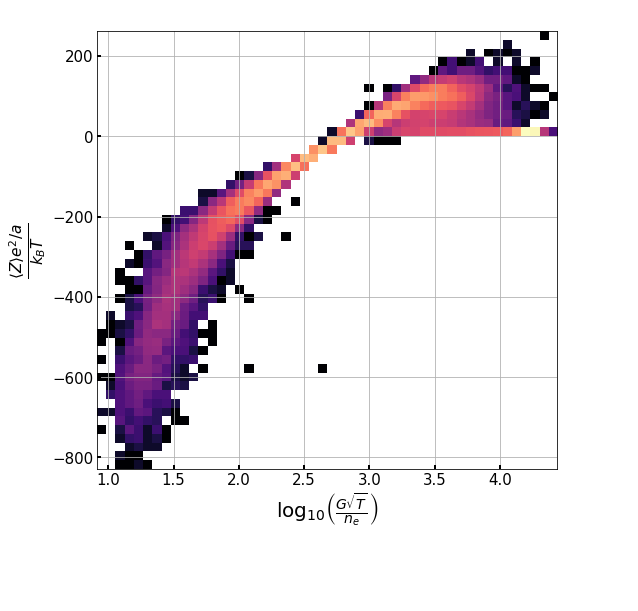

In [40]:
xsize = 8
ysize = 8

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.205
wpad = 0.09
w0   = 0.085

xs_panel = 0.80 / nfigs_x 
ys_panel = 0.76 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "title?", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

#H, xc, yc = np.histogram2d(np.log10(box["nH"]), np.log10(box["temp"]), weights=box["cell_mass"].in_units("Msun"), bins=50)
#H_norm = H / np.sum(box["cell_mass"].in_units("Msun").value)

floating_pot = cdist_10AA["zmean"]*fz.echarge**2 / (10.0*fz.AAtocm) / (fz.kb * cdist_10AA["temp"])

cax = ax.hist2d(np.log10(GTn_10AA), floating_pot, bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.set_xlabel("log$_{10}\\left(\\frac{G\\sqrt{T}}{n_{e}}\\right)$", fontsize=20)
ax.set_ylabel("$\\frac{\\langle Z \\rangle e^{2} / a}{k_{B} T}$", fontsize=22)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

#ax.set_ylim(-4.5, -0.2)

fig.show()

In [28]:
cdist_10AA.keys()

['nH',
 'zmean',
 'zstd',
 'nC',
 'xe',
 'xHp',
 'zmode',
 'zminmax',
 'fdist',
 'ne',
 'Qabs_mean',
 'xCp',
 'nH2',
 'G',
 'xH2',
 'grain_size',
 'info',
 'temp',
 'dens',
 'grain_type',
 'MPI',
 'Av',
 'tauz',
 'fH2shield']